<a href="https://colab.research.google.com/github/hasmira0105/Public-repo/blob/main/6th_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation = ImageDataGenerator(rescale=1/255)


training_dataset = train.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Train',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

validation_dataset = validation.flow_from_directory(
    '/content/drive/MyDrive/Dataset1/Validation',
    target_size = (300, 300),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 2000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential ([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(3, 3),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(3, 3),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')                
])

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1048608   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [6]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(
    training_dataset,
    steps_per_epoch = 8,
    epochs = 250,
    verbose = 1,
    validation_data = validation_dataset,
    validation_steps = 2
)

Epoch 1/250
8/8 [==============================] - 210s 23s/step - loss: 1.6671 - accuracy: 0.1900 - val_loss: 1.6274 - val_accuracy: 0.1600
Epoch 2/250
8/8 [==============================] - 159s 21s/step - loss: 1.6214 - accuracy: 0.1875 - val_loss: 1.6039 - val_accuracy: 0.1600
Epoch 3/250
8/8 [==============================] - 118s 15s/step - loss: 1.6063 - accuracy: 0.1800 - val_loss: 1.6027 - val_accuracy: 0.1600
Epoch 4/250
8/8 [==============================] - 98s 13s/step - loss: 1.6016 - accuracy: 0.2175 - val_loss: 1.5797 - val_accuracy: 0.2400
Epoch 5/250
8/8 [==============================] - 66s 9s/step - loss: 1.5892 - accuracy: 0.1925 - val_loss: 1.5711 - val_accuracy: 0.2400
Epoch 6/250
8/8 [==============================] - 53s 7s/step - loss: 1.5815 - accuracy: 0.2375 - val_loss: 1.5511 - val_accuracy: 0.3300
Epoch 7/250
8/8 [==============================] - 44s 6s/step - loss: 1.5808 - accuracy: 0.2650 - val_loss: 1.5412 - val_accuracy: 0.3400
Epoch 8/250
8/8 [===

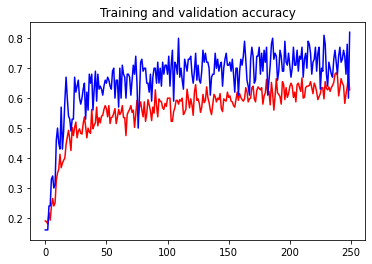

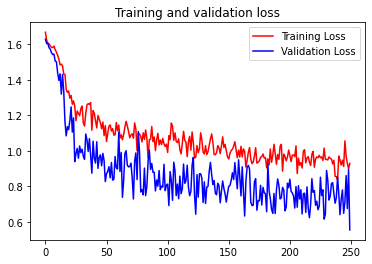

In [8]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# Generate a Saved Model
import tensorflow as tf

tf.saved_model.save(model, '/content/drive/MyDrive/MY model/SavedModel2')


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/MY model/SavedModel2/assets


In [12]:
import tensorflow as tf
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/MY model/SavedModel2')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('tf.lite')
tflite_model_file.write_bytes(tflite_model)

1073824

In [13]:
# Download TFlite 

from google.colab import files
files.download(tflite_model_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>